In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

from sklearn import tree, ensemble

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mobiles.csv')

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
x = []
y = []
x_test = []
y_test = []

for i in range(10):
    x_train, x_test_1, y_train, y_test_1 = train_test_split(data.drop(columns=['price_range'], axis=1),
                                                   data.price_range,
                                                   test_size=0.2)
    x.append(np.array(x_train))
    y.append(np.array(y_train))
    x_test.append(np.array(x_test_1))
    y_test.append(np.array(y_test_1))

x[0].shape, y[0].shape

((1600, 20), (1600,))

In [4]:
from time import time


def time_wrapper(func):
    def function(*args, **kwargs):
        start = time()
        result = func(*args, **kwargs)
        print(f'Function {func.__name__!r} executed in {time() - start}')
        return result
    return function

In [5]:
@time_wrapper
def bagging_method():
    models = []
    for i in range(10):
        model = tree.DecisionTreeClassifier(max_depth=8)
        model.fit(x[i], y[i])
        models.append(model)
    return models

In [6]:
model_1 = bagging_method()

Function 'bagging_method' executed in 0.13276338577270508


In [7]:
model_1

[DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=8)]

In [8]:
y_test = np.array(data.price_range)
x_test = np.array(data.drop(columns=['price_range'], axis=1))

x_test.shape, y_test.shape

((2000, 20), (2000,))

In [9]:
predicts = []
for i in range(10):
    predicts.append(model_1[i].predict(x_test))

(array([[500., 500., 500., 500.],
        [497., 485., 516., 502.],
        [493., 507., 506., 494.],
        [495., 493., 519., 493.],
        [481., 530., 492., 497.],
        [490., 513., 498., 499.],
        [494., 508., 501., 497.],
        [492., 519., 500., 489.],
        [487., 515., 506., 492.],
        [498., 503., 506., 493.],
        [491., 520., 487., 502.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 11 BarContainer objects>)

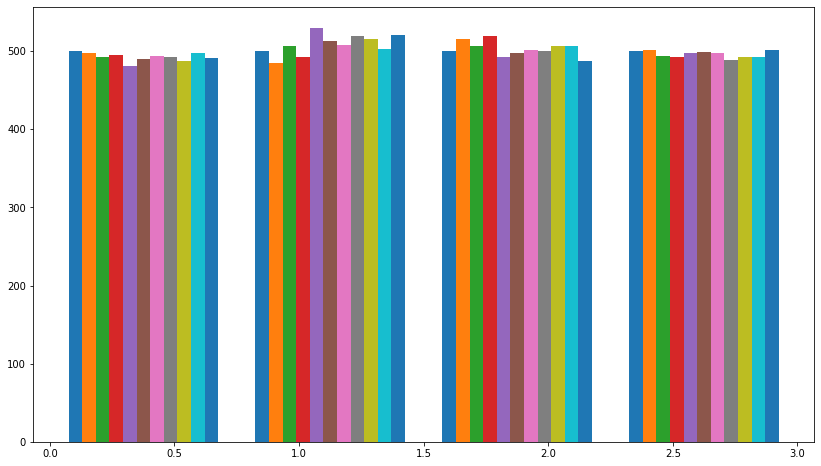

In [30]:
plt.figure(figsize=(14, 8))

check = [y_test]

for i in range(10):
    check.append(predicts[i])

check = np.stack(np.asarray(check), axis=1)

plt.hist(check, bins=4)

In [37]:
mean_pred = np.round(np.array(predicts).mean(axis=0))

mean_pred

array([2., 2., 2., ..., 3., 0., 3.])

(array([[500., 500., 500., 500.],
        [495., 505., 502., 498.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 2 BarContainer objects>)

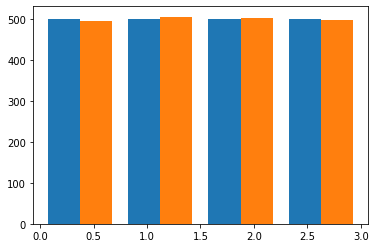

In [38]:
check_1 = np.array([y_test, mean_pred])

check_1 = np.stack(check_1, axis=1)

plt.hist(check_1, bins=4)

(array([[500., 500., 500., 500.],
        [509., 499., 499., 493.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 2 BarContainer objects>)

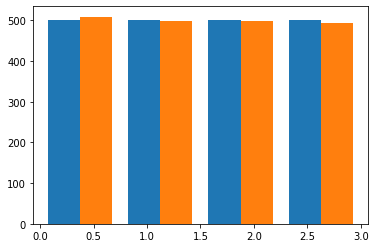

In [31]:
test_model = tree.DecisionTreeClassifier(max_depth=8, criterion='entropy')
test_model.fit(data.drop(columns=['price_range'], axis=1), data.price_range)
test_predict = test_model.predict(data.drop(columns=['price_range'], axis=1))

check_2 = np.array([y_test, test_predict])

check_2 = np.stack(check_2, axis=1)

plt.hist(check_2, bins=4)

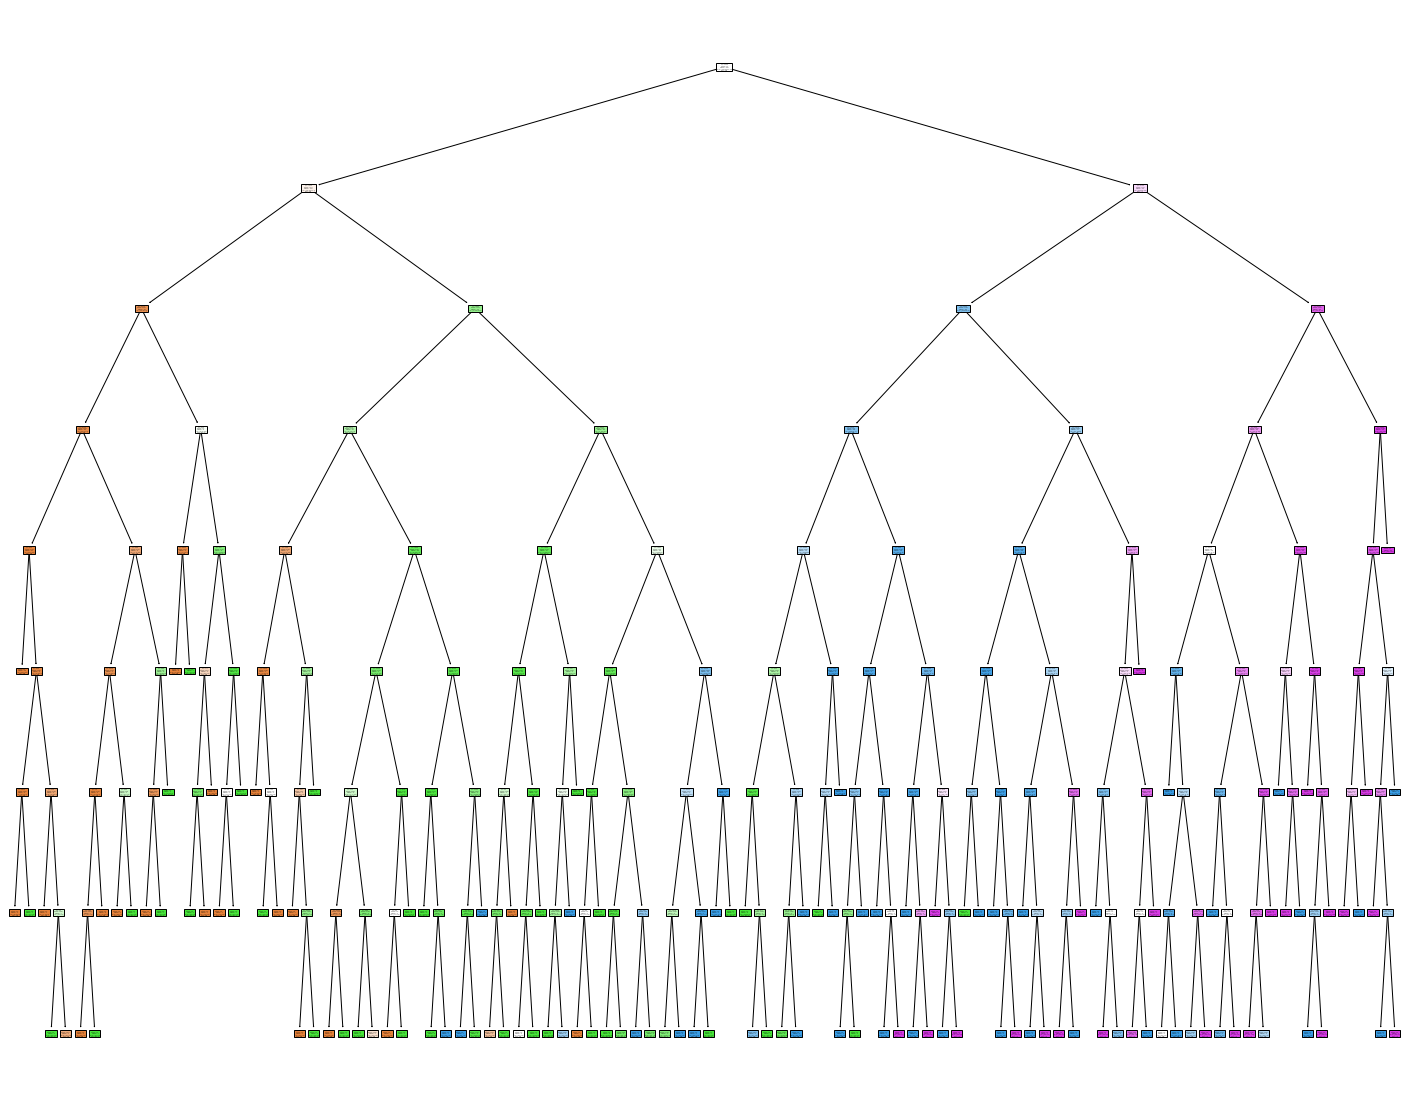

In [32]:
%matplotlib inline

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(test_model, 
                   feature_names=data.price_range,  
                   class_names=['low', 'medium', 'high', 'rich'],
                   filled=True)

fig.savefig("decistion_tree_test.png", dpi=500)

In [15]:
import catboost as cb

In [16]:
@time_wrapper
def catboos_func():
    model_cb = cb.CatBoostClassifier(iterations=3000)
    model_cb.fit(data.drop(columns=['price_range'], axis=1)[:int(len(data)*0.8)], 
                 data.price_range[:int(len(data)*0.8)])
    return model_cb


In [17]:
model_cb = catboos_func()

Learning rate set to 0.032031
0:	learn: 1.3402741	total: 159ms	remaining: 7m 56s
1:	learn: 1.3011231	total: 171ms	remaining: 4m 15s
2:	learn: 1.2649841	total: 178ms	remaining: 2m 58s
3:	learn: 1.2292955	total: 187ms	remaining: 2m 19s
4:	learn: 1.1943032	total: 195ms	remaining: 1m 56s
5:	learn: 1.1569626	total: 203ms	remaining: 1m 41s
6:	learn: 1.1290700	total: 210ms	remaining: 1m 29s
7:	learn: 1.1006859	total: 217ms	remaining: 1m 21s
8:	learn: 1.0716853	total: 225ms	remaining: 1m 14s
9:	learn: 1.0462381	total: 231ms	remaining: 1m 9s
10:	learn: 1.0209326	total: 239ms	remaining: 1m 4s
11:	learn: 0.9962884	total: 246ms	remaining: 1m 1s
12:	learn: 0.9751152	total: 253ms	remaining: 58.2s
13:	learn: 0.9556787	total: 260ms	remaining: 55.4s
14:	learn: 0.9351178	total: 267ms	remaining: 53.1s
15:	learn: 0.9138007	total: 273ms	remaining: 50.9s
16:	learn: 0.8986878	total: 279ms	remaining: 49s
17:	learn: 0.8797920	total: 286ms	remaining: 47.4s
18:	learn: 0.8610521	total: 292ms	remaining: 45.8s
19:	

168:	learn: 0.2469787	total: 1.42s	remaining: 23.7s
169:	learn: 0.2466987	total: 1.42s	remaining: 23.7s
170:	learn: 0.2457211	total: 1.43s	remaining: 23.6s
171:	learn: 0.2449164	total: 1.43s	remaining: 23.6s
172:	learn: 0.2437703	total: 1.44s	remaining: 23.5s
173:	learn: 0.2425628	total: 1.44s	remaining: 23.4s
174:	learn: 0.2416394	total: 1.45s	remaining: 23.4s
175:	learn: 0.2403004	total: 1.45s	remaining: 23.3s
176:	learn: 0.2394248	total: 1.46s	remaining: 23.3s
177:	learn: 0.2382801	total: 1.46s	remaining: 23.2s
178:	learn: 0.2375986	total: 1.47s	remaining: 23.2s
179:	learn: 0.2360921	total: 1.48s	remaining: 23.1s
180:	learn: 0.2354649	total: 1.48s	remaining: 23.1s
181:	learn: 0.2345490	total: 1.49s	remaining: 23s
182:	learn: 0.2339809	total: 1.49s	remaining: 23s
183:	learn: 0.2332610	total: 1.5s	remaining: 22.9s
184:	learn: 0.2326622	total: 1.5s	remaining: 22.9s
185:	learn: 0.2320286	total: 1.51s	remaining: 22.8s
186:	learn: 0.2312627	total: 1.51s	remaining: 22.8s
187:	learn: 0.2303

338:	learn: 0.1454091	total: 2.63s	remaining: 20.7s
339:	learn: 0.1451526	total: 2.64s	remaining: 20.7s
340:	learn: 0.1447749	total: 2.65s	remaining: 20.7s
341:	learn: 0.1441766	total: 2.66s	remaining: 20.6s
342:	learn: 0.1437456	total: 2.66s	remaining: 20.6s
343:	learn: 0.1435223	total: 2.67s	remaining: 20.6s
344:	learn: 0.1431163	total: 2.68s	remaining: 20.6s
345:	learn: 0.1425853	total: 2.69s	remaining: 20.6s
346:	learn: 0.1422654	total: 2.69s	remaining: 20.6s
347:	learn: 0.1419673	total: 2.7s	remaining: 20.6s
348:	learn: 0.1416443	total: 2.71s	remaining: 20.6s
349:	learn: 0.1413134	total: 2.72s	remaining: 20.6s
350:	learn: 0.1408331	total: 2.73s	remaining: 20.6s
351:	learn: 0.1405375	total: 2.73s	remaining: 20.6s
352:	learn: 0.1403236	total: 2.74s	remaining: 20.6s
353:	learn: 0.1401042	total: 2.75s	remaining: 20.5s
354:	learn: 0.1397282	total: 2.76s	remaining: 20.5s
355:	learn: 0.1392751	total: 2.76s	remaining: 20.5s
356:	learn: 0.1389599	total: 2.77s	remaining: 20.5s
357:	learn: 0

498:	learn: 0.1049162	total: 3.85s	remaining: 19.3s
499:	learn: 0.1046565	total: 3.86s	remaining: 19.3s
500:	learn: 0.1044575	total: 3.87s	remaining: 19.3s
501:	learn: 0.1042233	total: 3.87s	remaining: 19.3s
502:	learn: 0.1040085	total: 3.88s	remaining: 19.3s
503:	learn: 0.1036967	total: 3.89s	remaining: 19.3s
504:	learn: 0.1035369	total: 3.9s	remaining: 19.2s
505:	learn: 0.1033521	total: 3.9s	remaining: 19.2s
506:	learn: 0.1031380	total: 3.91s	remaining: 19.2s
507:	learn: 0.1028207	total: 3.92s	remaining: 19.2s
508:	learn: 0.1026736	total: 3.92s	remaining: 19.2s
509:	learn: 0.1024821	total: 3.93s	remaining: 19.2s
510:	learn: 0.1023466	total: 3.94s	remaining: 19.2s
511:	learn: 0.1020174	total: 3.95s	remaining: 19.2s
512:	learn: 0.1018827	total: 3.95s	remaining: 19.2s
513:	learn: 0.1017571	total: 3.96s	remaining: 19.2s
514:	learn: 0.1016288	total: 3.97s	remaining: 19.2s
515:	learn: 0.1013439	total: 3.98s	remaining: 19.1s
516:	learn: 0.1011370	total: 3.98s	remaining: 19.1s
517:	learn: 0.

668:	learn: 0.0804115	total: 5.07s	remaining: 17.7s
669:	learn: 0.0802166	total: 5.08s	remaining: 17.7s
670:	learn: 0.0800246	total: 5.09s	remaining: 17.7s
671:	learn: 0.0799010	total: 5.1s	remaining: 17.7s
672:	learn: 0.0797946	total: 5.11s	remaining: 17.7s
673:	learn: 0.0797008	total: 5.11s	remaining: 17.6s
674:	learn: 0.0795707	total: 5.12s	remaining: 17.6s
675:	learn: 0.0794303	total: 5.13s	remaining: 17.6s
676:	learn: 0.0793363	total: 5.13s	remaining: 17.6s
677:	learn: 0.0791786	total: 5.14s	remaining: 17.6s
678:	learn: 0.0790983	total: 5.15s	remaining: 17.6s
679:	learn: 0.0789896	total: 5.16s	remaining: 17.6s
680:	learn: 0.0788678	total: 5.16s	remaining: 17.6s
681:	learn: 0.0787618	total: 5.17s	remaining: 17.6s
682:	learn: 0.0786045	total: 5.18s	remaining: 17.6s
683:	learn: 0.0785495	total: 5.19s	remaining: 17.6s
684:	learn: 0.0784569	total: 5.19s	remaining: 17.6s
685:	learn: 0.0783285	total: 5.2s	remaining: 17.5s
686:	learn: 0.0782519	total: 5.21s	remaining: 17.5s
687:	learn: 0.

842:	learn: 0.0631957	total: 6.3s	remaining: 16.1s
843:	learn: 0.0631619	total: 6.31s	remaining: 16.1s
844:	learn: 0.0631012	total: 6.32s	remaining: 16.1s
845:	learn: 0.0630341	total: 6.33s	remaining: 16.1s
846:	learn: 0.0629868	total: 6.33s	remaining: 16.1s
847:	learn: 0.0628931	total: 6.34s	remaining: 16.1s
848:	learn: 0.0628278	total: 6.35s	remaining: 16.1s
849:	learn: 0.0627299	total: 6.36s	remaining: 16.1s
850:	learn: 0.0626428	total: 6.36s	remaining: 16.1s
851:	learn: 0.0625630	total: 6.37s	remaining: 16.1s
852:	learn: 0.0624755	total: 6.38s	remaining: 16.1s
853:	learn: 0.0624089	total: 6.39s	remaining: 16s
854:	learn: 0.0623298	total: 6.39s	remaining: 16s
855:	learn: 0.0622753	total: 6.4s	remaining: 16s
856:	learn: 0.0622057	total: 6.41s	remaining: 16s
857:	learn: 0.0621269	total: 6.42s	remaining: 16s
858:	learn: 0.0620688	total: 6.42s	remaining: 16s
859:	learn: 0.0619968	total: 6.43s	remaining: 16s
860:	learn: 0.0618927	total: 6.44s	remaining: 16s
861:	learn: 0.0618354	total: 6

1011:	learn: 0.0517120	total: 7.54s	remaining: 14.8s
1012:	learn: 0.0516714	total: 7.55s	remaining: 14.8s
1013:	learn: 0.0516334	total: 7.56s	remaining: 14.8s
1014:	learn: 0.0515383	total: 7.57s	remaining: 14.8s
1015:	learn: 0.0514863	total: 7.57s	remaining: 14.8s
1016:	learn: 0.0514535	total: 7.58s	remaining: 14.8s
1017:	learn: 0.0514036	total: 7.59s	remaining: 14.8s
1018:	learn: 0.0513452	total: 7.59s	remaining: 14.8s
1019:	learn: 0.0512844	total: 7.6s	remaining: 14.8s
1020:	learn: 0.0512249	total: 7.61s	remaining: 14.8s
1021:	learn: 0.0511466	total: 7.62s	remaining: 14.7s
1022:	learn: 0.0510919	total: 7.63s	remaining: 14.7s
1023:	learn: 0.0510223	total: 7.63s	remaining: 14.7s
1024:	learn: 0.0509745	total: 7.64s	remaining: 14.7s
1025:	learn: 0.0509349	total: 7.65s	remaining: 14.7s
1026:	learn: 0.0508495	total: 7.65s	remaining: 14.7s
1027:	learn: 0.0507764	total: 7.66s	remaining: 14.7s
1028:	learn: 0.0507053	total: 7.67s	remaining: 14.7s
1029:	learn: 0.0506100	total: 7.68s	remaining: 

1194:	learn: 0.0429788	total: 8.78s	remaining: 13.3s
1195:	learn: 0.0429117	total: 8.78s	remaining: 13.3s
1196:	learn: 0.0428755	total: 8.79s	remaining: 13.2s
1197:	learn: 0.0428358	total: 8.8s	remaining: 13.2s
1198:	learn: 0.0427815	total: 8.81s	remaining: 13.2s
1199:	learn: 0.0427315	total: 8.81s	remaining: 13.2s
1200:	learn: 0.0426661	total: 8.82s	remaining: 13.2s
1201:	learn: 0.0426293	total: 8.83s	remaining: 13.2s
1202:	learn: 0.0425903	total: 8.84s	remaining: 13.2s
1203:	learn: 0.0425386	total: 8.84s	remaining: 13.2s
1204:	learn: 0.0425164	total: 8.85s	remaining: 13.2s
1205:	learn: 0.0424763	total: 8.86s	remaining: 13.2s
1206:	learn: 0.0424348	total: 8.86s	remaining: 13.2s
1207:	learn: 0.0423606	total: 8.87s	remaining: 13.2s
1208:	learn: 0.0423334	total: 8.88s	remaining: 13.2s
1209:	learn: 0.0422964	total: 8.89s	remaining: 13.1s
1210:	learn: 0.0422733	total: 8.89s	remaining: 13.1s
1211:	learn: 0.0422423	total: 8.9s	remaining: 13.1s
1212:	learn: 0.0421946	total: 8.91s	remaining: 1

1357:	learn: 0.0371470	total: 10s	remaining: 12.1s
1358:	learn: 0.0371288	total: 10s	remaining: 12.1s
1359:	learn: 0.0371082	total: 10s	remaining: 12.1s
1360:	learn: 0.0370783	total: 10s	remaining: 12.1s
1361:	learn: 0.0370595	total: 10s	remaining: 12.1s
1362:	learn: 0.0370370	total: 10.1s	remaining: 12.1s
1363:	learn: 0.0370253	total: 10.1s	remaining: 12.1s
1364:	learn: 0.0369992	total: 10.1s	remaining: 12.1s
1365:	learn: 0.0369732	total: 10.1s	remaining: 12.1s
1366:	learn: 0.0369398	total: 10.1s	remaining: 12s
1367:	learn: 0.0369176	total: 10.1s	remaining: 12s
1368:	learn: 0.0368700	total: 10.1s	remaining: 12s
1369:	learn: 0.0368471	total: 10.1s	remaining: 12s
1370:	learn: 0.0368264	total: 10.1s	remaining: 12s
1371:	learn: 0.0367650	total: 10.1s	remaining: 12s
1372:	learn: 0.0367349	total: 10.1s	remaining: 12s
1373:	learn: 0.0367110	total: 10.1s	remaining: 12s
1374:	learn: 0.0366895	total: 10.1s	remaining: 12s
1375:	learn: 0.0366350	total: 10.2s	remaining: 12s
1376:	learn: 0.0366098	

1544:	learn: 0.0316489	total: 11s	remaining: 10.4s
1545:	learn: 0.0315945	total: 11s	remaining: 10.4s
1546:	learn: 0.0315694	total: 11.1s	remaining: 10.4s
1547:	learn: 0.0315524	total: 11.1s	remaining: 10.4s
1548:	learn: 0.0315259	total: 11.1s	remaining: 10.4s
1549:	learn: 0.0315014	total: 11.1s	remaining: 10.4s
1550:	learn: 0.0314587	total: 11.1s	remaining: 10.3s
1551:	learn: 0.0314434	total: 11.1s	remaining: 10.3s
1552:	learn: 0.0314222	total: 11.1s	remaining: 10.3s
1553:	learn: 0.0314066	total: 11.1s	remaining: 10.3s
1554:	learn: 0.0313617	total: 11.1s	remaining: 10.3s
1555:	learn: 0.0313303	total: 11.1s	remaining: 10.3s
1556:	learn: 0.0312979	total: 11.1s	remaining: 10.3s
1557:	learn: 0.0312783	total: 11.1s	remaining: 10.3s
1558:	learn: 0.0312646	total: 11.1s	remaining: 10.3s
1559:	learn: 0.0312424	total: 11.1s	remaining: 10.3s
1560:	learn: 0.0312273	total: 11.1s	remaining: 10.3s
1561:	learn: 0.0311973	total: 11.1s	remaining: 10.2s
1562:	learn: 0.0311405	total: 11.1s	remaining: 10.

1700:	learn: 0.0278951	total: 11.8s	remaining: 9.04s
1701:	learn: 0.0278636	total: 11.8s	remaining: 9.03s
1702:	learn: 0.0278530	total: 11.9s	remaining: 9.03s
1703:	learn: 0.0278435	total: 11.9s	remaining: 9.02s
1704:	learn: 0.0278318	total: 11.9s	remaining: 9.01s
1705:	learn: 0.0278182	total: 11.9s	remaining: 9s
1706:	learn: 0.0277931	total: 11.9s	remaining: 8.99s
1707:	learn: 0.0277694	total: 11.9s	remaining: 8.98s
1708:	learn: 0.0277519	total: 11.9s	remaining: 8.98s
1709:	learn: 0.0277406	total: 11.9s	remaining: 8.97s
1710:	learn: 0.0277290	total: 11.9s	remaining: 8.96s
1711:	learn: 0.0277178	total: 11.9s	remaining: 8.95s
1712:	learn: 0.0276957	total: 11.9s	remaining: 8.94s
1713:	learn: 0.0276849	total: 11.9s	remaining: 8.93s
1714:	learn: 0.0276483	total: 11.9s	remaining: 8.92s
1715:	learn: 0.0276338	total: 11.9s	remaining: 8.92s
1716:	learn: 0.0275914	total: 11.9s	remaining: 8.91s
1717:	learn: 0.0275627	total: 11.9s	remaining: 8.9s
1718:	learn: 0.0275455	total: 11.9s	remaining: 8.8

1864:	learn: 0.0249780	total: 12.7s	remaining: 7.7s
1865:	learn: 0.0249621	total: 12.7s	remaining: 7.7s
1866:	learn: 0.0249420	total: 12.7s	remaining: 7.69s
1867:	learn: 0.0249326	total: 12.7s	remaining: 7.68s
1868:	learn: 0.0249190	total: 12.7s	remaining: 7.67s
1869:	learn: 0.0249131	total: 12.7s	remaining: 7.67s
1870:	learn: 0.0248938	total: 12.7s	remaining: 7.66s
1871:	learn: 0.0248783	total: 12.7s	remaining: 7.65s
1872:	learn: 0.0248633	total: 12.7s	remaining: 7.64s
1873:	learn: 0.0248316	total: 12.7s	remaining: 7.63s
1874:	learn: 0.0248185	total: 12.7s	remaining: 7.63s
1875:	learn: 0.0248058	total: 12.7s	remaining: 7.62s
1876:	learn: 0.0247892	total: 12.7s	remaining: 7.61s
1877:	learn: 0.0247667	total: 12.7s	remaining: 7.6s
1878:	learn: 0.0247273	total: 12.7s	remaining: 7.59s
1879:	learn: 0.0247116	total: 12.7s	remaining: 7.59s
1880:	learn: 0.0247026	total: 12.7s	remaining: 7.58s
1881:	learn: 0.0246924	total: 12.7s	remaining: 7.57s
1882:	learn: 0.0246737	total: 12.7s	remaining: 7.

2028:	learn: 0.0224054	total: 13.5s	remaining: 6.45s
2029:	learn: 0.0223919	total: 13.5s	remaining: 6.45s
2030:	learn: 0.0223843	total: 13.5s	remaining: 6.44s
2031:	learn: 0.0223739	total: 13.5s	remaining: 6.43s
2032:	learn: 0.0223619	total: 13.5s	remaining: 6.42s
2033:	learn: 0.0223597	total: 13.5s	remaining: 6.42s
2034:	learn: 0.0223459	total: 13.5s	remaining: 6.41s
2035:	learn: 0.0223248	total: 13.5s	remaining: 6.4s
2036:	learn: 0.0223184	total: 13.5s	remaining: 6.39s
2037:	learn: 0.0222859	total: 13.5s	remaining: 6.39s
2038:	learn: 0.0222765	total: 13.5s	remaining: 6.38s
2039:	learn: 0.0222675	total: 13.5s	remaining: 6.37s
2040:	learn: 0.0222623	total: 13.5s	remaining: 6.37s
2041:	learn: 0.0222453	total: 13.6s	remaining: 6.36s
2042:	learn: 0.0222251	total: 13.6s	remaining: 6.35s
2043:	learn: 0.0222066	total: 13.6s	remaining: 6.34s
2044:	learn: 0.0221937	total: 13.6s	remaining: 6.34s
2045:	learn: 0.0221896	total: 13.6s	remaining: 6.33s
2046:	learn: 0.0221681	total: 13.6s	remaining: 

2223:	learn: 0.0199558	total: 14.5s	remaining: 5.06s
2224:	learn: 0.0199412	total: 14.5s	remaining: 5.05s
2225:	learn: 0.0199303	total: 14.5s	remaining: 5.05s
2226:	learn: 0.0199103	total: 14.5s	remaining: 5.04s
2227:	learn: 0.0198985	total: 14.5s	remaining: 5.03s
2228:	learn: 0.0198806	total: 14.5s	remaining: 5.03s
2229:	learn: 0.0198729	total: 14.5s	remaining: 5.02s
2230:	learn: 0.0198641	total: 14.5s	remaining: 5.01s
2231:	learn: 0.0198483	total: 14.5s	remaining: 5s
2232:	learn: 0.0198342	total: 14.6s	remaining: 5s
2233:	learn: 0.0198251	total: 14.6s	remaining: 4.99s
2234:	learn: 0.0198120	total: 14.6s	remaining: 4.98s
2235:	learn: 0.0198042	total: 14.6s	remaining: 4.98s
2236:	learn: 0.0197964	total: 14.6s	remaining: 4.97s
2237:	learn: 0.0197799	total: 14.6s	remaining: 4.96s
2238:	learn: 0.0197726	total: 14.6s	remaining: 4.96s
2239:	learn: 0.0197586	total: 14.6s	remaining: 4.95s
2240:	learn: 0.0197486	total: 14.6s	remaining: 4.94s
2241:	learn: 0.0197440	total: 14.6s	remaining: 4.93s

2386:	learn: 0.0182207	total: 15.3s	remaining: 3.94s
2387:	learn: 0.0182133	total: 15.3s	remaining: 3.93s
2388:	learn: 0.0182070	total: 15.3s	remaining: 3.92s
2389:	learn: 0.0181973	total: 15.3s	remaining: 3.92s
2390:	learn: 0.0181879	total: 15.4s	remaining: 3.91s
2391:	learn: 0.0181814	total: 15.4s	remaining: 3.9s
2392:	learn: 0.0181720	total: 15.4s	remaining: 3.9s
2393:	learn: 0.0181591	total: 15.4s	remaining: 3.89s
2394:	learn: 0.0181535	total: 15.4s	remaining: 3.88s
2395:	learn: 0.0181487	total: 15.4s	remaining: 3.88s
2396:	learn: 0.0181420	total: 15.4s	remaining: 3.87s
2397:	learn: 0.0181370	total: 15.4s	remaining: 3.86s
2398:	learn: 0.0181328	total: 15.4s	remaining: 3.85s
2399:	learn: 0.0181260	total: 15.4s	remaining: 3.85s
2400:	learn: 0.0181112	total: 15.4s	remaining: 3.84s
2401:	learn: 0.0181012	total: 15.4s	remaining: 3.83s
2402:	learn: 0.0180937	total: 15.4s	remaining: 3.83s
2403:	learn: 0.0180818	total: 15.4s	remaining: 3.82s
2404:	learn: 0.0180718	total: 15.4s	remaining: 3

2542:	learn: 0.0167779	total: 16.2s	remaining: 2.9s
2543:	learn: 0.0167699	total: 16.2s	remaining: 2.9s
2544:	learn: 0.0167627	total: 16.2s	remaining: 2.89s
2545:	learn: 0.0167557	total: 16.2s	remaining: 2.88s
2546:	learn: 0.0167408	total: 16.2s	remaining: 2.88s
2547:	learn: 0.0167270	total: 16.2s	remaining: 2.87s
2548:	learn: 0.0167178	total: 16.2s	remaining: 2.86s
2549:	learn: 0.0167108	total: 16.2s	remaining: 2.86s
2550:	learn: 0.0167043	total: 16.2s	remaining: 2.85s
2551:	learn: 0.0166970	total: 16.2s	remaining: 2.84s
2552:	learn: 0.0166878	total: 16.2s	remaining: 2.84s
2553:	learn: 0.0166812	total: 16.2s	remaining: 2.83s
2554:	learn: 0.0166672	total: 16.2s	remaining: 2.82s
2555:	learn: 0.0166576	total: 16.2s	remaining: 2.82s
2556:	learn: 0.0166515	total: 16.2s	remaining: 2.81s
2557:	learn: 0.0166325	total: 16.2s	remaining: 2.8s
2558:	learn: 0.0166251	total: 16.2s	remaining: 2.8s
2559:	learn: 0.0166161	total: 16.2s	remaining: 2.79s
2560:	learn: 0.0166062	total: 16.2s	remaining: 2.7

2715:	learn: 0.0152812	total: 17.2s	remaining: 1.8s
2716:	learn: 0.0152769	total: 17.2s	remaining: 1.79s
2717:	learn: 0.0152655	total: 17.2s	remaining: 1.78s
2718:	learn: 0.0152629	total: 17.2s	remaining: 1.78s
2719:	learn: 0.0152557	total: 17.2s	remaining: 1.77s
2720:	learn: 0.0152482	total: 17.2s	remaining: 1.76s
2721:	learn: 0.0152414	total: 17.2s	remaining: 1.76s
2722:	learn: 0.0152325	total: 17.2s	remaining: 1.75s
2723:	learn: 0.0152276	total: 17.2s	remaining: 1.75s
2724:	learn: 0.0152163	total: 17.2s	remaining: 1.74s
2725:	learn: 0.0152117	total: 17.3s	remaining: 1.73s
2726:	learn: 0.0152040	total: 17.3s	remaining: 1.73s
2727:	learn: 0.0152013	total: 17.3s	remaining: 1.72s
2728:	learn: 0.0151933	total: 17.3s	remaining: 1.72s
2729:	learn: 0.0151875	total: 17.3s	remaining: 1.71s
2730:	learn: 0.0151833	total: 17.3s	remaining: 1.7s
2731:	learn: 0.0151769	total: 17.3s	remaining: 1.7s
2732:	learn: 0.0151657	total: 17.3s	remaining: 1.69s
2733:	learn: 0.0151603	total: 17.3s	remaining: 1.

2898:	learn: 0.0139921	total: 18.2s	remaining: 635ms
2899:	learn: 0.0139830	total: 18.2s	remaining: 628ms
2900:	learn: 0.0139786	total: 18.2s	remaining: 622ms
2901:	learn: 0.0139701	total: 18.2s	remaining: 616ms
2902:	learn: 0.0139646	total: 18.2s	remaining: 609ms
2903:	learn: 0.0139588	total: 18.2s	remaining: 603ms
2904:	learn: 0.0139499	total: 18.3s	remaining: 597ms
2905:	learn: 0.0139454	total: 18.3s	remaining: 591ms
2906:	learn: 0.0139413	total: 18.3s	remaining: 584ms
2907:	learn: 0.0139368	total: 18.3s	remaining: 578ms
2908:	learn: 0.0139314	total: 18.3s	remaining: 572ms
2909:	learn: 0.0139234	total: 18.3s	remaining: 565ms
2910:	learn: 0.0139192	total: 18.3s	remaining: 559ms
2911:	learn: 0.0139167	total: 18.3s	remaining: 553ms
2912:	learn: 0.0139132	total: 18.3s	remaining: 546ms
2913:	learn: 0.0139072	total: 18.3s	remaining: 540ms
2914:	learn: 0.0139029	total: 18.3s	remaining: 534ms
2915:	learn: 0.0138924	total: 18.3s	remaining: 527ms
2916:	learn: 0.0138812	total: 18.3s	remaining:

In [18]:
predicts_cb = model_cb.predict(data.drop(columns=['price_range'], axis=1)).reshape(-1)

np.ceil(predicts_cb)

array([1., 2., 2., ..., 3., 0., 3.])

(array([[500., 500., 500., 500.],
        [500., 507., 498., 495.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 2 BarContainer objects>)

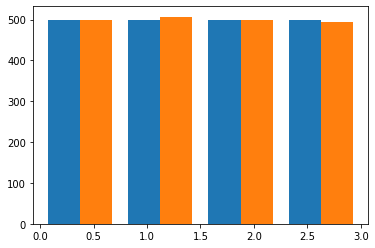

In [19]:
check_3 = np.array([y_test, predicts_cb])

check_3 = np.stack(check_3, axis=1)

plt.hist(check_3, bins=4)

In [20]:
from xgboost import XGBClassifier

In [21]:
@time_wrapper
def xgb_func():
    model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model_xgb.fit(data.drop(columns=['price_range'], axis=1)[:int(len(data)*0.8)], 
                 data.price_range[:int(len(data)*0.8)])
    return model_xgb

In [22]:
model_xgb = xgb_func()

Function 'xgb_func' executed in 1.4400060176849365


In [23]:
xgb_predicts = model_xgb.predict(data.drop(columns=['price_range'], axis=1))

xgb_predicts

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

(array([[500., 500., 500., 500.],
        [500., 507., 498., 495.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 2 BarContainer objects>)

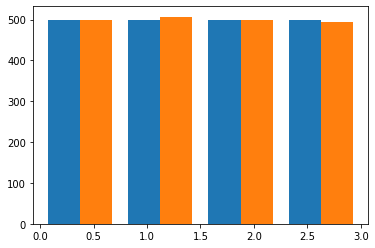

In [24]:
check_4 = np.array([y_test, predicts_cb])

check_4 = np.stack(check_4, axis=1)

plt.hist(check_4, bins=4)

In [25]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_xgb = accuracy_score(y_test, xgb_predicts)

accuracy_xgb

0.9775

In [48]:
accuracy_cb = accuracy_score(y_test, predicts_cb)

accuracy_cb

0.987

In [52]:
accuracy_forest_mean = accuracy_score(y_test, mean_pred)

accuracy_forest_mean

0.9865

In [50]:
accuracy_forest_mode = accuracy_score(y_test, mod_pred[0][0])

accuracy_forest_mode

0.987

In [51]:
accuracy_tree = accuracy_score(y_test, test_predict)

accuracy_tree

0.982

In [44]:
from scipy import stats

mod_pred = stats.mode(np.array(predicts))

mod_pred[0][0]

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

(array([[500., 500., 500., 500.],
        [495., 508., 499., 498.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 2 BarContainer objects>)

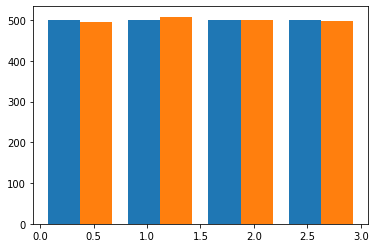

In [45]:
check_5 = np.array([y_test, mod_pred[0][0]])

check_5 = np.stack(check_5, axis=1)

plt.hist(check_5, bins=4)

<BarContainer object of 3 artists>

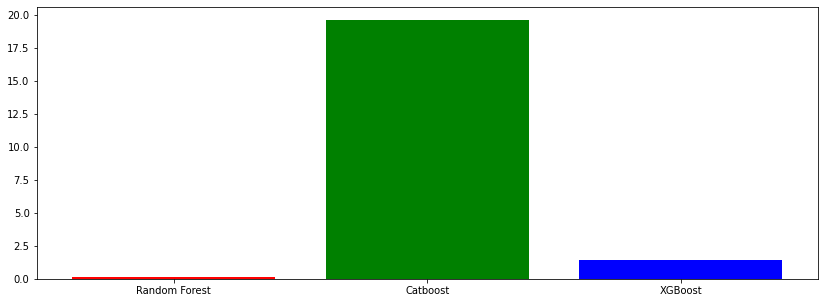

In [64]:
plt.figure(figsize=(14, 5))

x_time = ['Random Forest', 'Catboost', 'XGBoost']
y_time = [0.13276338577270508, 19.600623607635498, 1.4400060176849365]

plt.bar(x_time, y_time, color=['r', 'g', 'b'])

<BarContainer object of 5 artists>

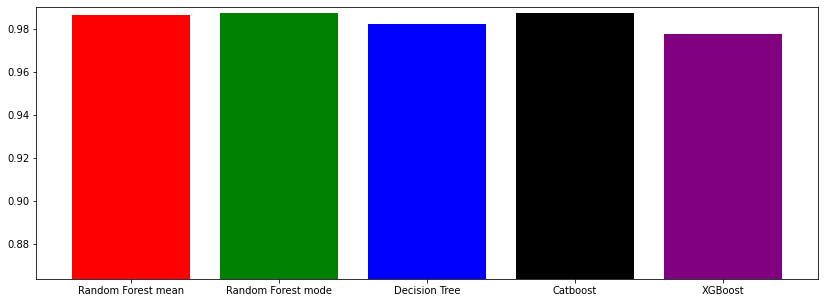

In [63]:
plt.figure(figsize=(14, 5))

x_acc = ['Random Forest mean', 'Random Forest mode', 'Decision Tree', 'Catboost', 'XGBoost']
y_acc = [0.9865, 0.987, 0.982, 0.987, 0.9775]

plt.ylim((0.864, 0.99))

plt.bar(x_acc, y_acc, color=['r', 'g', 'b', 'black', 'purple'])